DATA SET LINK:

kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

DATA SET LINK: https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

100% 324M/325M [00:17<00:00, 19.8MB/s]
100% 325M/325M [00:17<00:00, 19.4MB/s]


In [ ]:
import zipfile
a = zipfile.ZipFile('/content/skin-cancer-malignant-vs-benign.zip','r')
a.extractall('/content')
a.close()

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
np.random.seed(21)


In [ ]:
from PIL import Image

directory_benign_train = '/content/train/benign'
directory_malignant_train = '/content/train/malignant'
directory_benign_test = '/content/test/benign'
directory_malignant_test = '/content/test/malignant'
read = lambda imname: np.asarray(Image.open(imname).convert('RGB'))

img_benign_train = [read(os.path.join(directory_benign_train, filename)) for filename in os.listdir(directory_benign_train)]
img_malignant_train = [read(os.path.join(directory_malignant_train, filename)) for filename in os.listdir(directory_malignant_train)]


img_benign_test = [read(os.path.join(directory_benign_test, filename)) for filename in os.listdir(directory_benign_test)]
img_malignant_test = [read(os.path.join(directory_malignant_test, filename)) for filename in os.listdir(directory_malignant_test)]

type(img_benign_train)

list

In [ ]:


X_benign_train = np.array(img_benign_train, dtype='uint8')
X_malignant_train = np.array(img_malignant_train, dtype='uint8')

X_benign_test = np.array(img_benign_test, dtype='uint8')
X_malignant_test = np.array(img_malignant_test, dtype='uint8')

type(X_benign_train)

numpy.ndarray

In [ ]:


y_benign_train = np.zeros(X_benign_train.shape[0])
y_malignant_train = np.ones(X_malignant_train.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

y_malignant_train

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:


X_train = np.concatenate((X_benign_train, X_malignant_train), axis=0)
y_train = np.concatenate((y_benign_train, y_malignant_train), axis=0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis=0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis=0)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

y_test

Shape of X_train:  (2637, 224, 224, 3)
Shape of y_train:  (2637,)
Shape of X_test:  (660, 224, 224, 3)
Shape of y_test:  (660,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
s1 = np.arange(X_train.shape[0])
np.random.shuffle(s1)
X_train = X_train[s1]
y_train = y_train[s1]

s2 = np.arange(X_test.shape[0])
np.random.shuffle(s2)
X_test = X_test[s2]
y_test = y_test[s2]

In [ ]:
print("Shuffle orders example: ", s1)

Shuffle orders example:  [1410  127 2157 ...  772 1848 1231]


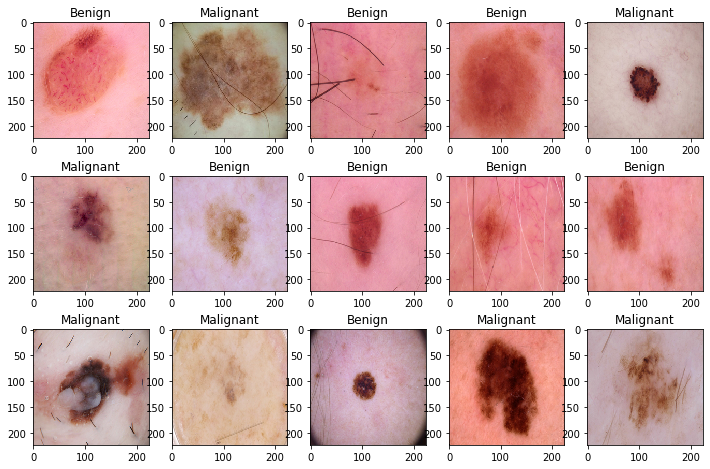

In [ ]:
fig = plt.figure(figsize=(12,8))
columns = 5
rows = 3

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [ ]:
import keras
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

type(y_train)

numpy.ndarray

In [ ]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:

X_train = X_train/255
X_test = X_test/255

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop

def build_cnn_model(input_shape = (224, 224, 3), num_classes=2):
    model = Sequential()

    model.add(Conv2D(64, kernel_size=(3,3), padding='Same', input_shape = input_shape, activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(64, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))

    model.add(Dense(num_classes, activation = 'softmax'))
    model.summary()
    optimizer= Adam(lr=0.001)

    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])

    return model

In [ ]:


model_cnn = build_cnn_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',mode='max',
                                          patience=3,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr = 1e-4)


history = model_cnn.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size = 64,
                    verbose=1,
                    callbacks=[learning_rate_annealer],validation_data=(X_test,y_test))



print(history.history.keys())

Epoch 1/50
42/42 [==============================] - ETA: 0s - loss: 0.9848 - accuracy: 0.5578

42/42 [==============================] - 18s 199ms/step - loss: 0.9848 - accuracy: 0.5578 - val_loss: 0.6619 - val_accuracy: 0.7030 - lr: 0.0010
Epoch 2/50
41/42 [============================>.] - ETA: 0s - loss: 0.5623 - accuracy: 0.6974

42/42 [==============================] - 7s 161ms/step - loss: 0.5619 - accuracy: 0.6978 - val_loss: 0.5792 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 3/50
41/42 [============================>.] - ETA: 0s - loss: 0.4577 - accuracy: 0.7744

42/42 [==============================] - 7s 162ms/step - loss: 0.4569 - accuracy: 0.7751 - val_loss: 0.5749 - val_accuracy: 0.6636 - lr: 0.0010
Epoch 4/50
41/42 [============================>.] - ETA: 0s - loss: 0.4083 - accuracy: 0.7915

42/42 [==============================] - 7s 161ms/step - loss: 0.4095 - accuracy: 0.7903 - val_loss: 0.4784 - val_accuracy: 0.7576 - lr: 0.0010
Epoch 5/50
41/42 [============================>.] - ETA: 0s - loss: 0.4235 - accuracy: 0.7820

42/42 [==============================] - 7s 161ms/step - loss: 0.4230 - accuracy: 0.7819 - val_loss: 0.4929 - val_accuracy: 0.7788 - lr: 0.0010
Epoch 6/50
41/42 [============================>.] - ETA: 0s - loss: 0.3830 - accuracy: 0.8216

42/42 [==============================] - 7s 162ms/step - loss: 0.3829 - accuracy: 0.8221 - val_loss: 0.3992 - val_accuracy: 0.8030 - lr: 0.0010
Epoch 7/50
41/42 [============================>.] - ETA: 0s - loss: 0.3246 - accuracy: 0.8335

42/42 [==============================] - 7s 164ms/step - loss: 0.3242 - accuracy: 0.8343 - val_loss: 0.3976 - val_accuracy: 0.7909 - lr: 0.0010
Epoch 8/50
41/42 [============================>.] - ETA: 0s - loss: 0.3036 - accuracy: 0.8510

42/42 [==============================] - 7s 163ms/step - loss: 0.3046 - accuracy: 0.8502 - val_loss: 0.3848 - val_accuracy: 0.7985 - lr: 0.0010
Epoch 9/50
41/42 [============================>.] - ETA: 0s - loss: 0.2760 - accuracy: 0.8750

42/42 [==============================] - 7s 162ms/step - loss: 0.2758 - accuracy: 0.8749 - val_loss: 0.3855 - val_accuracy: 0.8106 - lr: 0.0010
Epoch 10/50
41/42 [============================>.] - ETA: 0s - loss: 0.2511 - accuracy: 0.8773

42/42 [==============================] - 7s 163ms/step - loss: 0.2512 - accuracy: 0.8775 - val_loss: 0.4014 - val_accuracy: 0.8076 - lr: 0.0010
Epoch 11/50
41/42 [============================>.] - ETA: 0s - loss: 0.2414 - accuracy: 0.8876

42/42 [==============================] - 7s 164ms/step - loss: 0.2410 - accuracy: 0.8878 - val_loss: 0.4508 - val_accuracy: 0.7924 - lr: 0.0010
Epoch 12/50
41/42 [============================>.] - ETA: 0s - loss: 0.2569 - accuracy: 0.8883

42/42 [==============================] - 7s 162ms/step - loss: 0.2562 - accuracy: 0.8889 - val_loss: 0.4076 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 13/50
41/42 [============================>.] - ETA: 0s - loss: 0.1829 - accuracy: 0.9188

42/42 [==============================] - 7s 163ms/step - loss: 0.1825 - accuracy: 0.9188 - val_loss: 0.3947 - val_accuracy: 0.8242 - lr: 0.0010
Epoch 14/50
41/42 [============================>.] - ETA: 0s - loss: 0.1506 - accuracy: 0.9421

42/42 [==============================] - 7s 163ms/step - loss: 0.1518 - accuracy: 0.9416 - val_loss: 0.4607 - val_accuracy: 0.7924 - lr: 0.0010
Epoch 15/50
41/42 [============================>.] - ETA: 0s - loss: 0.2017 - accuracy: 0.9139

42/42 [==============================] - 7s 163ms/step - loss: 0.2014 - accuracy: 0.9139 - val_loss: 0.4510 - val_accuracy: 0.8227 - lr: 0.0010
Epoch 16/50
41/42 [============================>.] - ETA: 0s - loss: 0.1408 - accuracy: 0.9459

42/42 [==============================] - 7s 162ms/step - loss: 0.1413 - accuracy: 0.9458 - val_loss: 0.4793 - val_accuracy: 0.8076 - lr: 0.0010
Epoch 17/50
42/42 [==============================] - ETA: 0s - loss: 0.1356 - accuracy: 0.9454

42/42 [==============================] - 7s 164ms/step - loss: 0.1356 - accuracy: 0.9454 - val_loss: 0.4938 - val_accuracy: 0.8106 - lr: 0.0010
Epoch 18/50
41/42 [============================>.] - ETA: 0s - loss: 0.1491 - accuracy: 0.9371

42/42 [==============================] - 7s 162ms/step - loss: 0.1487 - accuracy: 0.9370 - val_loss: 0.5104 - val_accuracy: 0.8030 - lr: 0.0010
Epoch 19/50
41/42 [============================>.] - ETA: 0s - loss: 0.1202 - accuracy: 0.9527

42/42 [==============================] - 7s 162ms/step - loss: 0.1197 - accuracy: 0.9530 - val_loss: 0.6307 - val_accuracy: 0.8227 - lr: 0.0010
Epoch 20/50
41/42 [============================>.] - ETA: 0s - loss: 0.1141 - accuracy: 0.9505

42/42 [==============================] - 7s 162ms/step - loss: 0.1136 - accuracy: 0.9507 - val_loss: 0.6093 - val_accuracy: 0.8273 - lr: 0.0010
Epoch 21/50
41/42 [============================>.] - ETA: 0s - loss: 0.0967 - accuracy: 0.9630

42/42 [==============================] - 7s 163ms/step - loss: 0.0966 - accuracy: 0.9632 - val_loss: 0.6467 - val_accuracy: 0.7924 - lr: 0.0010
Epoch 22/50
41/42 [============================>.] - ETA: 0s - loss: 0.0672 - accuracy: 0.9768

42/42 [==============================] - 7s 163ms/step - loss: 0.0672 - accuracy: 0.9769 - val_loss: 0.6766 - val_accuracy: 0.8197 - lr: 0.0010
Epoch 23/50
41/42 [============================>.] - ETA: 0s - loss: 0.0605 - accuracy: 0.9745

42/42 [==============================] - 7s 163ms/step - loss: 0.0609 - accuracy: 0.9742 - val_loss: 0.6720 - val_accuracy: 0.8288 - lr: 0.0010
Epoch 24/50
41/42 [============================>.] - ETA: 0s - loss: 0.1900 - accuracy: 0.9348

42/42 [==============================] - 7s 162ms/step - loss: 0.1897 - accuracy: 0.9352 - val_loss: 0.5199 - val_accuracy: 0.7955 - lr: 0.0010
Epoch 25/50
41/42 [============================>.] - ETA: 0s - loss: 0.0977 - accuracy: 0.9630

42/42 [==============================] - 7s 162ms/step - loss: 0.0978 - accuracy: 0.9628 - val_loss: 0.6903 - val_accuracy: 0.8197 - lr: 0.0010
Epoch 26/50
41/42 [============================>.] - ETA: 0s - loss: 0.0663 - accuracy: 0.9745

42/42 [==============================] - 7s 162ms/step - loss: 0.0660 - accuracy: 0.9746 - val_loss: 0.7284 - val_accuracy: 0.8212 - lr: 0.0010
Epoch 27/50
41/42 [============================>.] - ETA: 0s - loss: 0.0487 - accuracy: 0.9840

42/42 [==============================] - 7s 162ms/step - loss: 0.0486 - accuracy: 0.9841 - val_loss: 0.7729 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 28/50
41/42 [============================>.] - ETA: 0s - loss: 0.0471 - accuracy: 0.9836

42/42 [==============================] - 7s 162ms/step - loss: 0.0469 - accuracy: 0.9837 - val_loss: 0.6354 - val_accuracy: 0.8258 - lr: 0.0010
Epoch 29/50
41/42 [============================>.] - ETA: 0s - loss: 0.0414 - accuracy: 0.9848

42/42 [==============================] - 7s 162ms/step - loss: 0.0412 - accuracy: 0.9848 - val_loss: 0.6852 - val_accuracy: 0.8303 - lr: 0.0010
Epoch 30/50
41/42 [============================>.] - ETA: 0s - loss: 0.0209 - accuracy: 0.9931

42/42 [==============================] - 7s 162ms/step - loss: 0.0221 - accuracy: 0.9924 - val_loss: 0.8940 - val_accuracy: 0.8394 - lr: 0.0010
Epoch 31/50
41/42 [============================>.] - ETA: 0s - loss: 0.0822 - accuracy: 0.9703

42/42 [==============================] - 7s 163ms/step - loss: 0.0819 - accuracy: 0.9704 - val_loss: 0.6673 - val_accuracy: 0.8197 - lr: 0.0010
Epoch 32/50
41/42 [============================>.] - ETA: 0s - loss: 0.0379 - accuracy: 0.9863

42/42 [==============================] - 7s 162ms/step - loss: 0.0378 - accuracy: 0.9863 - val_loss: 0.7984 - val_accuracy: 0.8258 - lr: 0.0010
Epoch 33/50
41/42 [============================>.] - ETA: 0s - loss: 0.0478 - accuracy: 0.9806

42/42 [==============================] - 7s 162ms/step - loss: 0.0478 - accuracy: 0.9807 - val_loss: 0.8577 - val_accuracy: 0.8167 - lr: 0.0010
Epoch 34/50
41/42 [============================>.] - ETA: 0s - loss: 0.0473 - accuracy: 0.9836

42/42 [==============================] - 7s 162ms/step - loss: 0.0472 - accuracy: 0.9837 - val_loss: 0.9078 - val_accuracy: 0.8242 - lr: 0.0010
Epoch 35/50
41/42 [============================>.] - ETA: 0s - loss: 0.0240 - accuracy: 0.9935

42/42 [==============================] - 7s 162ms/step - loss: 0.0239 - accuracy: 0.9936 - val_loss: 0.8887 - val_accuracy: 0.8394 - lr: 0.0010
Epoch 36/50
41/42 [============================>.] - ETA: 0s - loss: 0.0167 - accuracy: 0.9943

42/42 [==============================] - 7s 164ms/step - loss: 0.0166 - accuracy: 0.9943 - val_loss: 0.9585 - val_accuracy: 0.8455 - lr: 0.0010
Epoch 37/50
41/42 [============================>.] - ETA: 0s - loss: 0.0482 - accuracy: 0.9848

42/42 [==============================] - 7s 162ms/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.9047 - val_accuracy: 0.8167 - lr: 0.0010
Epoch 38/50
41/42 [============================>.] - ETA: 0s - loss: 0.0203 - accuracy: 0.9916

42/42 [==============================] - 7s 161ms/step - loss: 0.0202 - accuracy: 0.9917 - val_loss: 0.8798 - val_accuracy: 0.8424 - lr: 0.0010
Epoch 39/50
41/42 [============================>.] - ETA: 0s - loss: 0.0087 - accuracy: 0.9970

42/42 [==============================] - 7s 162ms/step - loss: 0.0087 - accuracy: 0.9970 - val_loss: 0.9446 - val_accuracy: 0.8318 - lr: 0.0010
Epoch 40/50
41/42 [============================>.] - ETA: 0s - loss: 0.0197 - accuracy: 0.9928

42/42 [==============================] - 7s 162ms/step - loss: 0.0196 - accuracy: 0.9928 - val_loss: 0.9377 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 41/50
41/42 [============================>.] - ETA: 0s - loss: 0.0241 - accuracy: 0.9916

42/42 [==============================] - 7s 163ms/step - loss: 0.0240 - accuracy: 0.9917 - val_loss: 0.9049 - val_accuracy: 0.8394 - lr: 0.0010
Epoch 42/50
41/42 [============================>.] - ETA: 0s - loss: 0.0109 - accuracy: 0.9970

42/42 [==============================] - 7s 161ms/step - loss: 0.0109 - accuracy: 0.9970 - val_loss: 0.9614 - val_accuracy: 0.8318 - lr: 0.0010
Epoch 43/50
41/42 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9989

42/42 [==============================] - 7s 163ms/step - loss: 0.0054 - accuracy: 0.9989 - val_loss: 1.0990 - val_accuracy: 0.8106 - lr: 0.0010
Epoch 44/50
41/42 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9989

42/42 [==============================] - 7s 163ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 1.0253 - val_accuracy: 0.8394 - lr: 0.0010
Epoch 45/50
41/42 [============================>.] - ETA: 0s - loss: 0.0045 - accuracy: 0.9989

42/42 [==============================] - 7s 162ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.9885 - val_accuracy: 0.8379 - lr: 0.0010
Epoch 46/50
41/42 [============================>.] - ETA: 0s - loss: 0.0170 - accuracy: 0.9920

42/42 [==============================] - 7s 162ms/step - loss: 0.0171 - accuracy: 0.9920 - val_loss: 1.0918 - val_accuracy: 0.8227 - lr: 0.0010
Epoch 47/50
41/42 [============================>.] - ETA: 0s - loss: 0.0615 - accuracy: 0.9775

42/42 [==============================] - 7s 162ms/step - loss: 0.0622 - accuracy: 0.9772 - val_loss: 0.9088 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 48/50
41/42 [============================>.] - ETA: 0s - loss: 0.0252 - accuracy: 0.9916

42/42 [==============================] - 7s 162ms/step - loss: 0.0251 - accuracy: 0.9917 - val_loss: 0.9469 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 49/50
41/42 [============================>.] - ETA: 0s - loss: 0.0119 - accuracy: 0.9962

42/42 [==============================] - 7s 163ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.8879 - val_accuracy: 0.8318 - lr: 0.0010
Epoch 50/50
41/42 [============================>.] - ETA: 0s - loss: 0.0133 - accuracy: 0.9958

42/42 [==============================] - 7s 161ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 1.1886 - val_accuracy: 0.8136 - lr: 0.0010
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


In [ ]:
import cv2

In [ ]:
a=cv2.imread('/content/m.jpeg')

In [ ]:
a.shape

(137, 135, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/m.jpeg', target_size=(224, 224))

In [ ]:
img_array = image.img_to_array(img)
#print(img_array)
img_batch = np.expand_dims(img_array, axis=0)
print(img_batch)

[[[[211. 154. 171.]
   [211. 154. 171.]
   [214. 155. 173.]
   ...
   [200. 130. 120.]
   [200. 132. 123.]
   [200. 132. 123.]]

  [[211. 154. 171.]
   [211. 154. 171.]
   [214. 155. 173.]
   ...
   [200. 130. 120.]
   [200. 132. 123.]
   [200. 132. 123.]]

  [[209. 152. 169.]
   [209. 152. 169.]
   [209. 152. 167.]
   ...
   [198. 128. 118.]
   [202. 132. 124.]
   [202. 132. 124.]]

  ...

  [[201. 143. 141.]
   [201. 143. 141.]
   [209. 152. 145.]
   ...
   [216. 158. 156.]
   [215. 157. 153.]
   [215. 157. 153.]]

  [[202. 148. 148.]
   [202. 148. 148.]
   [201. 145. 144.]
   ...
   [219. 163. 162.]
   [215. 160. 157.]
   [215. 160. 157.]]

  [[202. 148. 148.]
   [202. 148. 148.]
   [201. 145. 144.]
   ...
   [219. 163. 162.]
   [215. 160. 157.]
   [215. 160. 157.]]]]


In [ ]:

img_preprocessed = preprocess_input(img_batch)
print(img_preprocessed)

[[[[67.061    37.221    87.32    ]
   [67.061    37.221    87.32    ]
   [69.061    38.221    90.32    ]
   ...
   [16.060997 13.221001 76.32    ]
   [19.060997 15.221001 76.32    ]
   [19.060997 15.221001 76.32    ]]

  [[67.061    37.221    87.32    ]
   [67.061    37.221    87.32    ]
   [69.061    38.221    90.32    ]
   ...
   [16.060997 13.221001 76.32    ]
   [19.060997 15.221001 76.32    ]
   [19.060997 15.221001 76.32    ]]

  [[65.061    35.221    85.32    ]
   [65.061    35.221    85.32    ]
   [63.060997 35.221    85.32    ]
   ...
   [14.060997 11.221001 74.32    ]
   [20.060997 15.221001 78.32    ]
   [20.060997 15.221001 78.32    ]]

  ...

  [[37.060997 26.221    77.32    ]
   [37.060997 26.221    77.32    ]
   [41.060997 35.221    85.32    ]
   ...
   [52.060997 41.221    92.32    ]
   [49.060997 40.221    91.32    ]
   [49.060997 40.221    91.32    ]]

  [[44.060997 31.221    78.32    ]
   [44.060997 31.221    78.32    ]
   [40.060997 28.221    77.32    ]
   ...
   [5

In [ ]:
a=history.model.predict(img_preprocessed)

1/1 [==============================] - 0s 155ms/step


In [ ]:
print(a)

[[0. 1.]]


In [ ]:
print(a[0][1])

1.0


In [ ]:
def classify(a):
  if (a[0][0]==1 and a[0][1]==0):
    print("belgin")
  else:
    print("malignant")

In [ ]:
print(classify(a))

malignant
None


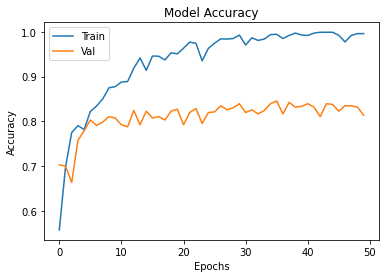

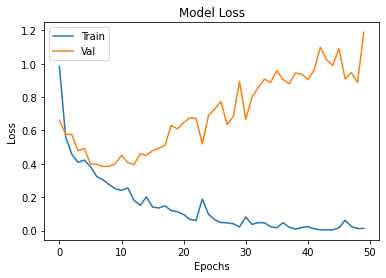

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()